In [1]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


# Import libraries and packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

import emoji
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB


from sklearn import metrics


# Load datasets

In [3]:
train = pd.read_csv("train.csv")

# EDA

In [4]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   7274 non-null   int64 
 1   tweet      7273 non-null   object
 2   sentiment  7274 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 170.6+ KB


In [6]:
#checking if any null values
train.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [7]:
#To display the one row which is null
empty_row = [row for row in train.index if train['tweet'].isnull()[row]] 
train.iloc[empty_row]

,tweet_id,tweet,sentiment
1274,6,NaN,1


In [8]:
#null value drop
train.dropna(inplace=True)
train.reset_index(inplace=True)

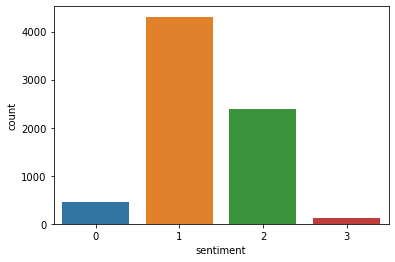

In [9]:
#Displaying the count graph of the sentiments in train
sns.countplot(train['sentiment'])

In [10]:
#Dropping the rows which has sentiment value as 3 because these are not adding any value in the accuracy
train=train[train['sentiment']!=3]

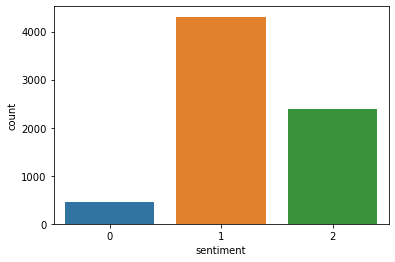

In [11]:
#Display the count of sentiments values after dropping the sentiment value 3
sns.countplot(train['sentiment'])

In [12]:
train['sentiment'].value_counts()

1    4310
2    2382
0     456
Name: sentiment, dtype: int64

In [13]:
#Checking and converting the emoji into text

def clean_emoji(text):
    for c in text:
        if c in emoji.UNICODE_EMOJI:
            return emoji.demojize(text)
    return text

train['tweet'] = train['tweet'].apply(clean_emoji)

In [14]:
#Encoding the text by removing the Non-ASCII characters

def text_encoding(text): 
    st = (text.encode('ascii', 'ignore')).decode("utf-8")
    return st

train['tweet'] = train['tweet'].apply(text_encoding)


In [15]:
#Removing hastag sxsw which is occurring the most and adding no value

def remove_sxsw(text):
    text = text.lower()
    text = " ".join(word for word in text.split(' ') if not (word.startswith('#sxsw')|(word.startswith('sxsw'))))
    return text

train['tweet']=train['tweet'].apply(remove_sxsw)


In [16]:
for i in train['tweet']:
    print(i)

#apple defining language of touch with different dialects becoming smaller
learning ab google doodles! all doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #googledoodle
one of the most in-your-face ex. of stealing the show in yrs rt @mention &quot;at apple schools the mkt experts&quot;  {link}
this iphone app would b pretty awesome if it didn't crash every 10mins during extended browsing. #fuckit #illmakeitwork
line outside the apple store in austin waiting for the new ipad  {link}
#technews one lone dude awaits ipad 2 at apples store {link} #tech_news #apple #ipad_2 #tablets #tech
tips, prince, npr videos, toy shopping with zuckerberg.
{link}   #ipad
nu user rt @mention new #ubersocial for #iphone now in the app store includes uberguide to sponsored by #mashable
free sampler on itunes {link} #freemusic
i think i might go all weekend without seeing the same ipad case twice...
it's official! i'm buying an ipad. #elevate
they're giving away ipa

who uses google tv in this room? nobody raises a hand in a packed room at the #socialviewing session at
thank you @mention @mention for the #touchingstories preso . here's their deck {link}
ain't no party like a google party, cause a google party got tacos n ice cream
to kick off @mention is giving away an ipad 2... just visit the fb page to enter: {link}
awesome! rt @mention download 20+ free tracks from the music sampler available on the @mention store today!  {link}
@mention @mention does the pop up apple store in austin still have ipad2 in stock? #lazyweb
rt @mention to the dude propping his ipad on the urinal, your time isn't that valuable #ewww
great article on possible future social media #boston #apple @mention the next twitter? {link}
totally agree @mention check out googletv to ipad apps: the connected tv
{link} #connectedtv fascinating!
3/5 available for android. &gt;&gt; 5 absolute, must-have apps to rock interactive by @mention {link} via @mention
does anyone know if the a

got the #vmware talent community ipad app rockin and signing up talented professionals tonight! find me! {link}
free playlist.. enjoy {link}
.crowdbeacon has put together a guide to at {link} the latest update to their iphone app is going to be sick.
come celebrate austin with google and gsd&amp;m at - hotpot blog {link} #fb
bored during keynote but have an ipad  {link}
rt @mention time to #wakeuplaughing @mention for #iphone is on the #appstore! itun.es/ifr3dw
kicking it 80's style at the @mention party with @mention and @mention {link} {link}
rt @mention epicurious, flipboard, cnn, wired, and moma as examples of good ipad design  {link}
trying to balance the power of power needs on iphone vs ipad at this 3g ipad sucks it out quick. might have go airplane mode.
#health2dev zeiger &quot;health is moving so much slower than we could be.&quot; #google
checking out ipad design headaches (author josh clark) #tapworthy
rt @mention matt damon upstairs at the google party maggie maes 6th st
s

rt @mention style x &amp; @mention - brethren pop-ups! ://m.theatlantic.com/technology/archive/2011/03/apple-sets-up-temporary-megastore-at-sxsw/72296/
rt @mention rt @mention apple opening a pop-up store downtown austin for and ipad 2 launch {link}
#techcrunch #google this post has nothing to do with editors note: this is a guest po... {link} #facebook @mention
@mention glad to hear it. have you had a chance to create your own iphone case with us yet? let's make it happen! #zazzlesxsw
all lbs apps on my iphone think i am in orlando :)) ! i guess i have 2 check in at disney vs :))
#google #circles #shice /via @mention {link}
apple popup store!  @mention apple store, {link} #photo
out of a room of 50+ people, only 1 other person than i makes accessible apps... and he works for google android #donline
rt @mention hi! if you accidentally took my ipad from the #techi set #pepsicostage, 
would you please return it to me?
xmas!! rt @mention shiny new @mention @mention @mention apps, a new @g

airport delay to just introduced @mention to #catphysics. i feel like a drug pusher: first ipad play is free but after that...
rt @mention google to launch major new social network called circles, possibly today @mention {link} #privacy ?
rt @mention only at &quot;my iphone will tell me. you know what that means? #winning&quot; - @mention
rt @mention &quot;google before you tweet is the new think before you speak&quot; -- belinsky of digital democracy /via @mention
omg sign me up! until when? rt @mention we're officially at come by the @mention grill &amp; youll get to make your own iphone case!
 happy woman's day! make love, not fuss! _ {link} _ #edchat #musedchat #classical #newtwitter
rt @mention listening to @mention discuss new interaction paradigms in designing for the ipad #uxdes
class starts now. @mention designing ipad interfaces - new navigation schemas {link}
rt @mention just posted my interview with @mention about the @mention story. that was really fun! {link} #appsavvy
rt

In [17]:
#Extracting the hastags from the tweets and making a new column for them

train['hastags']=train['tweet'].apply(lambda x: re.findall(r"#(\w+)", x))

In [18]:
#extracting the top 10 frequent hastags in a DataFrame

df=pd.DataFrame(train['hastags'].value_counts()[1:10])
df['name']= df.index
df.reset_index(drop=True,inplace=True)
df['name'] = df['name'].astype('str')
df


,hastags,name
0,123,['apple']
1,118,['ipad2']
2,71,['google']
3,62,['ipad']
4,43,"['google', 'circles']"
5,37,"['apple', 'ipad2']"
6,34,['android']
7,31,['tapworthy']
8,30,['qagb']


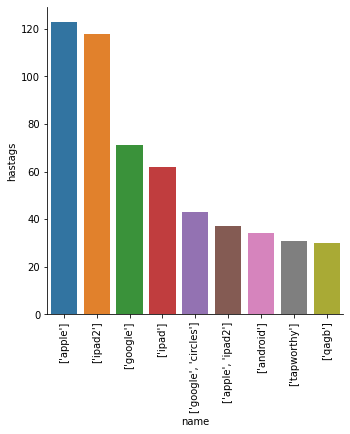

In [19]:
# TOP TEN USED HASTAGS

sns.catplot(x='name',y='hastags',data=df,kind='bar')
plt.xticks(Rotation = 90);

In [20]:
#Removing extra text from the data 

def remove_extra(text):
    text=text.replace('@mention',"")
    text=text.replace('link',"")
    text=text.replace('#',"")
    text=text.replace('rt',"")
    return text
        
train['tweet']= train['tweet'].apply(remove_extra)


In [21]:
#Removing http links from the data

train['tweet']=train['tweet'].apply(lambda x:re.sub(r'http\S+', '', x))


In [22]:
#Removing punctutation from the data

def remove_punct(text):
    text  = "".join([char for char in str(text) if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

train['tweet'] = train['tweet'].apply(lambda x: remove_punct(x))


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7148 entries, 0 to 7272
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      7148 non-null   int64 
 1   tweet_id   7148 non-null   int64 
 2   tweet      7148 non-null   object
 3   sentiment  7148 non-null   int64 
 4   hastags    7148 non-null   object
dtypes: int64(3), object(2)
memory usage: 655.1+ KB


In [24]:
# Tokenize and Lemmetize

stopwords = nltk.corpus.stopwords.words("english")
wnl = WordNetLemmatizer()
def clean(tweet):
    words = nltk.word_tokenize(tweet)
    tweet = ' '.join([wnl.lemmatize(word) for word in words if word not in set(stopwords)])
    return tweet
train['tweet'] = train['tweet'].apply(lambda x:clean(x))


In [25]:
train.reset_index(inplace=True)

# Spliting and Vectorization

In [26]:
X= train['tweet'].values
y= train['sentiment'].values

In [27]:
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y,random_state=42, test_size=0.2, shuffle=True)

In [28]:
print (xtrain.shape)
print (xvalid.shape)
print(ytrain.shape)
print (yvalid.shape)

(5718,)
(1430,)
(5718,)
(1430,)


In [29]:
# Fitting TF-IDF to both training and validation sets (semi-supervised learning)

tfv = TfidfVectorizer(ngram_range=(1, 3),max_features=3000)
#made vectors with single word , bi-gram and tri-gram , also taking only limited features 3000 out of approx 20k features

tfv.fit(xtrain) 
tfv.fit(xvalid)

xtrain_tfv =  tfv.transform(xtrain) 
xvalid_tfv =  tfv.transform(xvalid) 


In [30]:
xvalid_tfv.shape , xtrain_tfv.shape

((1430, 3000), (5718, 3000))

# Modelling

In [ ]:
# applying all the listed models and displaying the classification report of each models
lr = LogisticRegression()
rf= RandomForestClassifier()
et = ExtraTreesClassifier()
xgb= XGBClassifier()
lgb = LGBMClassifier()
mnb = MultinomialNB()

classifiers = {et,lr,rf,xgb,lgb,mnb}

for clf in classifiers:
    clf.fit(xtrain_tfv,ytrain)
    predictions = clf.predict(xvalid_tfv)   
    print("Weighted f1 score for",clf.__class__.__name__,"is: ",round(metrics.f1_score(yvalid, predictions, average='weighted'),3))


Weighted f1 score for LogisticRegression is:  0.623
Weighted f1 score for XGBClassifier is:  0.65
Weighted f1 score for LGBMClassifier is:  0.632
Weighted f1 score for ExtraTreesClassifier is:  0.658
Weighted f1 score for MultinomialNB is:  0.6
